<a href="https://colab.research.google.com/github/dtoralg/IE_Calidad_ML/blob/main/Ejercicios/Modulo%205/Modulo_5_Ejercicio_1_Sobreajuste_Arboles_Resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Ejercicio 1: ¿Cuándo un modelo se está sobreajustando? Visualízalo tú mismo**
**Diagnóstico visual del sobreajuste ajustando la profundidad de un árbol de decisión**

### **Introducción**
En este ejercicio vamos a analizar cómo la complejidad de un modelo de árbol de decisión puede llevar al fenómeno del **sobreajuste (overfitting)**.
Para ello, entrenaremos múltiples modelos variando el hiperparámetro `max_depth` y evaluaremos su rendimiento tanto en el conjunto de entrenamiento como en el de validación.

El objetivo es visualizar claramente cómo aumenta el error de validación cuando el modelo se vuelve demasiado complejo y deja de generalizar bien a nuevos datos.

In [1]:
# Celda 1: Carga de librerías y configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
sns.set(style='whitegrid')

In [2]:
# Celda 2: Cargar y explorar el dataset
url = 'https://github.com/dtoralg/IE_Calidad_ML/raw/main/Data/control_calidad_piezas_metalicas.csv'
df = pd.read_csv(url)
df.head()

,ID_pieza,Temperatura,Presión_molde,Tiempo_inyección,Viscosidad_material,Humedad_ambiente,Energía_consumida,Operario_turno,Día_semana,Lote_producción,Desgaste_molde,Tiempo_desmoldeo,Ancho_pieza,Altura_pieza,Defecto
0,1,209.934283,1529.461844,6.030595,2.450860,39.217029,5.779265,Operario_3,Lunes,Lote_13,0.458149,3.688541,50.157288,101.279351,OK
1,2,197.234714,1480.767531,3.844645,3.121770,43.969118,9.031166,Operario_5,Viernes,Lote_6,0.505443,3.834900,59.949957,96.724974,KO
2,3,212.953771,1785.537227,5.575437,2.862635,43.672496,6.462271,Operario_4,Miércoles,Lote_14,0.597260,3.286921,43.763784,118.998853,KO
3,4,230.460597,1959.849342,4.380762,2.217833,33.957695,12.616841,Operario_5,Domingo,Lote_13,0.332967,3.305580,52.769876,115.421844,KO
4,5,195.316933,1706.054083,4.672597,1.591750,72.752929,10.004330,Operario_5,Lunes,Lote_17,0.565406,2.961457,46.792873,97.644322,OK


In [3]:
# Celda 3: Descripción del dataset
print('Tamaño del dataset:', df.shape)
df['Defecto'].value_counts(normalize=True)

Tamaño del dataset: (50000, 15)


,proportion
Defecto,
OK,0.50146
KO,0.49854


In [4]:
# Celda 4: Preprocesamiento del dataset
# Separar X e y
X = df.drop(columns=['ID_pieza', 'Defecto'])
y = df['Defecto'].map({'OK': 0, 'KO': 1})

# Identificar columnas categóricas y numéricas
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(exclude='object').columns.tolist()

# Crear pipeline de preprocesamiento
preprocessor = ColumnTransformer([
    ('num', SimpleImputer(strategy='median'), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

In [5]:
# Celda 5: División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [6]:
# Celda 6: Entrenamiento con diferentes profundidades
train_scores = []
test_scores = []
depths = range(1, 21)

for depth in depths:
    clf = Pipeline([
        ('preproc', preprocessor),
        ('model', DecisionTreeClassifier(max_depth=depth, random_state=42))
    ])
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_scores.append(f1_score(y_train, y_train_pred))
    test_scores.append(f1_score(y_test, y_test_pred))

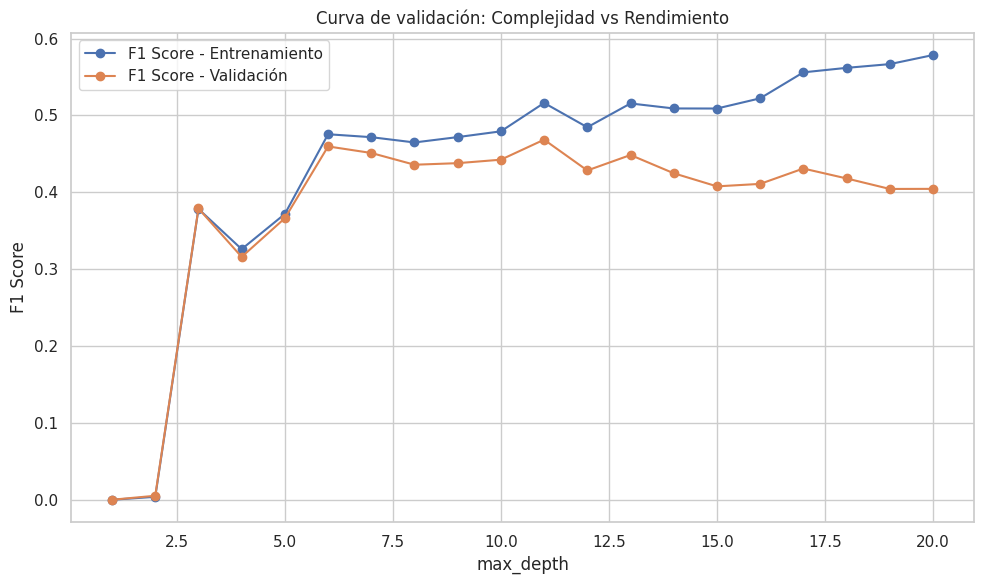

In [7]:
# Celda 7: Visualización del sobreajuste
plt.figure(figsize=(10,6))
plt.plot(depths, train_scores, label='F1 Score - Entrenamiento', marker='o')
plt.plot(depths, test_scores, label='F1 Score - Validación', marker='o')
plt.xlabel('max_depth')
plt.ylabel('F1 Score')
plt.title('Curva de validación: Complejidad vs Rendimiento')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Conclusiones**
- Al aumentar `max_depth`, el modelo mejora su rendimiento en el conjunto de entrenamiento, pero empieza a **perder capacidad de generalización** en el conjunto de prueba.
- El punto donde la curva de validación (F1 Score en test) empieza a descender es una señal clara de **sobreajuste**.
- Limitar la profundidad del árbol es una forma simple y efectiva de **regularización estructural**.

### **Preguntas para reflexionar**
- ¿Qué profundidad elegirías para este problema y por qué?
- ¿Qué otras formas de regularización podrían aplicarse a árboles de decisión?
- ¿Cómo podrías automatizar la búsqueda de la mejor profundidad?